In [1]:
import numpy as np
import pandas as pd

## Prerequisites

In [2]:
# 파이썬을 아나콘다로 설치한 경우, 아래 명령어 대신 아나콘다 네비게이터(Anaconda Navigator)를 실행한 뒤
# 좌측의 환경(Environment) 탭에서 설치할 수 있습니다.
!pip install tensorflow

You are using pip version 9.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
# 파이썬을 아나콘다로 설치한 경우, 아래 명령어 대신 아나콘다 네비게이터(Anaconda Navigator)를 실행한 뒤
# 좌측의 환경(Environment) 탭에서 설치할 수 있습니다.
!pip install keras

  Could not fetch URL https://pypi.python.org/simple/keras/: There was a problem confirming the ssl certificate: [SSL: TLSV1_ALERT_PROTOCOL_VERSION] tlsv1 alert protocol version (_ssl.c:661) - skipping
  Could not find a version that satisfies the requirement keras (from versions: )
No matching distribution found for keras
You are using pip version 9.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


## MNIST Dataset

이번 과제는 [MNIST 필기체 데이터셋](http://yann.lecun.com/exdb/mnist/)을 활용하여 필기체 이미지를 인식하는 이미지 인식 알고리즘을 Multi-layer Neural Network로 작성합니다.

가로 28px, 세로 28px의 필기체 이미지가 주어지며, 필기체는 숫자 0부터 9까지 총 10개의 Label로 구성되어 있습니다. 이미지는 컬러가 없는 흑백 데이터이며, 한 픽셀의 값은 0 ~ 255 입니다. (0일수록 어둡고, 255일수록 밝습니다)

데이터는 60,000개의 Train 데이터와 10,000개의 Test 데이터가 주어지는데, Train 데이터로 Multi-layer Neural Network를 학습한 뒤 Test 데이터로 정확도(accuracy)를 측정합니다. 각 변수의 세부 정보는 다음과 같습니다.

  * **X_train**: **Train 데이터의 Feature** 입니다. 가로 28px, 세로 28px, 총 60,000개의 데이터로 구성되어 있습니다. 픽셀 하나의 값은 0 ~ 255 입니다. (0일수록 어둡고, 255일수록 밝습니다)
  * **y_train**: **Train 데이터의 Label** 입니다. 총 60,000 개이며, 이미지가 어떤 숫자를 나타내는지가 적혀 있습니다. 값은 0부터 9까지 입니다.
  * **X_test**: **Test 데이터의 Feature** 입니다. 가로 28px, 세로 28px, 총 10,000개의 데이터로 구성되어 있습니다. 픽셀 하나의 값은 0 ~ 255 입니다. (0일수록 어둡고, 255일수록 밝습니다)
  * **y_test**: **Test 데이터의 Label** 입니다. 총 10,000 개이며, 이미지가 어떤 숫자를 나타내는지가 적혀 있습니다. 값은 0부터 9까지 입니다.
  
** 주의 사항 **
  * 이전에 XOR data를 풀었던 코드를 조금만 응용하면 매우 쉽게 MNIST 데이터셋 문제를 풀 수 있습니다.
  * accuracy가 잘 올라가지 않고 그 이유를 잘 모르겠다면, Loss Function(=Cross Entropy)를 병행해서 사용해보세요. 앞서 언급드린대로 Loss Function은 "학습이 잘 될수록 0에 수렵하고, 학습이 잘 되지 않을수록 무한대로 발산합니다." 즉, Loss Function을 사용할 결과가 무한대로 발산하고 있다면 무언가 제대로 풀리지 않고 있다는 것입니다.
  * loss가 제대로 떨어지지 않는다면 문제는 크게 두 가지입니다. 1) weight의 초기값이 좋지 않거나, 2) learning rate가 너무 높거나 낮아서 생기는 문제입니다. loss가 떨어지지 않는다면 weight의 초기값과 learning rate를 바꿔보세요.

In [4]:
from keras.datasets import mnist

((X_train, y_train), (X_test, y_test)) = mnist.load_data()

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

Using TensorFlow backend.


(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


[5 0 4 1 9 2 1 3 1 4]


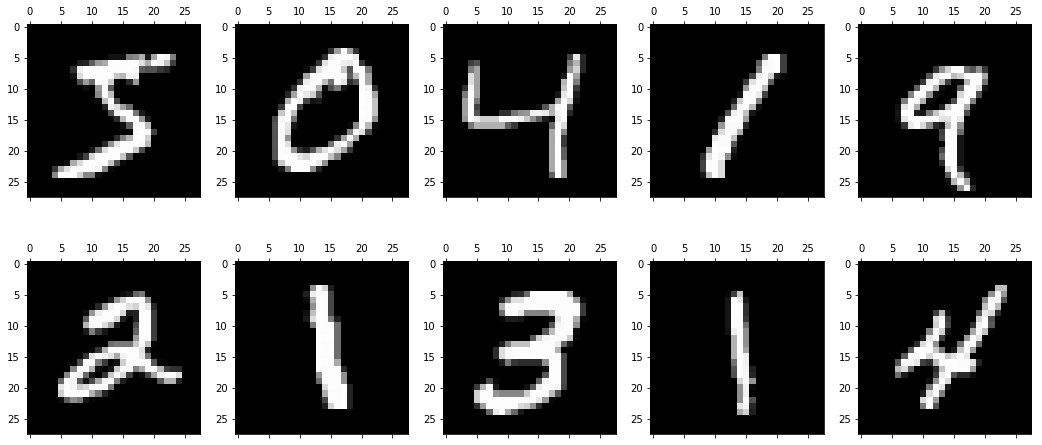

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.gray()

print(y_train[0:10])

figures, axes = plt.subplots(nrows=2, ncols=5)
figures.set_size_inches(18, 8)

axes[0][0].matshow(X_train[0])
axes[0][1].matshow(X_train[1])
axes[0][2].matshow(X_train[2])
axes[0][3].matshow(X_train[3])
axes[0][4].matshow(X_train[4])
axes[1][0].matshow(X_train[5])
axes[1][1].matshow(X_train[6])
axes[1][2].matshow(X_train[7])
axes[1][3].matshow(X_train[8])
axes[1][4].matshow(X_train[9])

## Preprocessing

In [6]:
X_train = X_train.reshape(60000, 28 * 28)
X_test = X_test.reshape(10000, 28 * 28)

print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


In [7]:
from keras.utils import to_categorical

# One hot encoding을 합니다.
# np.eye(10)[y_train]과 동일합니다.
y_train_hot = to_categorical(y_train)

# np.eye(10)[y_test]와 동일합니다.
y_test_hot = to_categorical(y_test)

print(y_train_hot.shape)
print(y_test_hot.shape)

(60000, 10)
(10000, 10)


### Define Sigmoid

In [8]:
def sigmoid(n):
    return 1 / (1 + np.exp(-n))

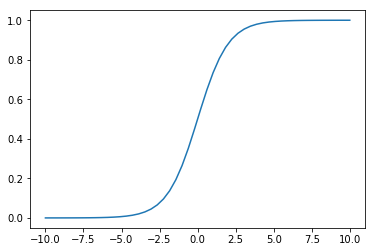

In [9]:
xx = np.linspace(-10, 10)
yy = sigmoid(xx)

plt.plot(xx, yy)

### Define Cross Entropy

In [ ]:
def cross_entropy(actual, predict, eps=1e-15):
    actual = np.array(actual)
    predict = np.array(predict)

    clipped_predict = np.minimum(np.maximum(predict, eps), 1 - eps)

    loss = actual * np.log(clipped_predict) + (1 - actual) * np.log(1 - clipped_predict)
    
    return -1.0 * loss.mean()

### Solving MNIST problem using Single-layer Neural Network

In [ ]:
num_epoch = 100
learning_rate = 0.1

w = np.random.uniform(low=-1.0, high=1.0, size=(784, 10))
b = np.random.uniform(low=-1.0, high=1.0, size=10)

for epoch in range(num_epoch):
    y_predict_hot = X_train.dot(w) + b
    y_predict_hot = sigmoid(y_predict_hot)
    
    y_predict = np.argmax(y_predict_hot, axis=1)
    accuracy = (y_predict == y_train).mean()
    if accuracy > 0.8:
        break

    loss = cross_entropy(y_train_hot, y_predict_hot)

    if epoch % 10 == 0:
        print("{0:2} accuracy = {1:.5f}, loss = {2:.5f}".format(epoch, accuracy, loss))

    w = w - learning_rate * X_train.T.dot(y_predict_hot - y_train_hot)
    b = b - learning_rate * (y_predict_hot - y_train_hot).mean(axis=0)


print("----" * 10)
print("{0:2} accuracy = {1:.5f}, loss = {2:.5f}".format(epoch, accuracy, loss))

/Users/jinhohyeon/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


 0 accuracy = 0.10607, loss = 18.06346
10 accuracy = 0.69435, loss = 2.79165
20 accuracy = 0.74805, loss = 1.97651
30 accuracy = 0.66805, loss = 2.00155
40 accuracy = 0.77535, loss = 1.62490
50 accuracy = 0.75258, loss = 1.43424


## Evaluate

### Train

In [ ]:
y_predict_hot = X_train.dot(w) + b
y_predict_hot = sigmoid(y_predict_hot)
y_predict = np.argmax(y_predict_hot, axis=1)

train_result = pd.DataFrame({'actual': y_train, 'predict': y_predict})

train_accuracy = (train_result["actual"] == train_result["predict"]).mean()

print("Accuracy(train) = {0:.5f}".format(train_accuracy))

print(train_result.shape)
train_result.head(10)

### Test

In [ ]:
y_predict_hot = X_test.dot(w) + b
y_predict_hot = sigmoid(y_predict_hot)
y_predict = np.argmax(y_predict_hot, axis=1)

test_result = pd.DataFrame({'actual': y_test, 'predict': y_predict})

test_accuracy = (test_result["actual"] == test_result["predict"]).mean()

print("Accuracy(test) = {0:.5f}".format(test_accuracy))

print(test_result.shape)
test_result.head(10)

### Solving MNIST problem using Multi-layer Neural Network

In [ ]:
num_epoch = 300
learning_rate = 0.000001

w1 = np.random.uniform(low=-0.057, high=0.057, size=(784, 1000))
w2 = np.random.uniform(low=-0.077, high=0.077, size=(1000, 10))

b1 = np.zeros((1, 1000))
b2 = np.zeros((1, 10))

for epoch in range(num_epoch):
    z1 = X_train.dot(w1) + b1
    a1 = sigmoid(z1)
    z2 = a1.dot(w2) + b2
    a2 = sigmoid(z2)

    y_predict_hot = a2
    y_predict = np.argmax(y_predict_hot, axis=1)
    accuracy = (y_predict == y_train).mean()
    if accuracy > 0.9:
        break

    loss = cross_entropy(y_train_hot, y_predict_hot)

    if epoch % 10 == 0:
        print("{0:2} accuracy = {1:.5f}, loss = {2:.5f}".format(epoch, accuracy, loss))

    d2 = a2 - y_train_hot
    d1 = d2.dot(w2.T) * a1 * (1 - a1)

    w2 = w2 - learn`ing_rate * a1.T.dot(d2)
    w1 = w1 - learning_rate * X_train.T.dot(d1)

    b2 = b2 - learning_rate * d2.mean(axis=0)
    b1 = b1 - learning_rate * d1.mean(axis=0)

print("----" * 10)
print("{0:2} accuracy = {1:.5f}, loss = {2:.5f}".format(epoch, accuracy, loss))

### Train (Result)

In [ ]:
z1 = X_train.dot(w1) + b1
a1 = sigmoid(z1)
z2 = a1.dot(w2) + b2
a2 = sigmoid(z2)

y_predict_hot = a2
y_predict = np.argmax(y_predict_hot, axis=1)

train_result = pd.DataFrame({'actual': y_train, 'predict': y_predict})

train_accuracy = (train_result["actual"] == train_result["predict"]).mean()

print("Accuracy(train) = {0:.5f}".format(train_accuracy))

print(train_result.shape)
train_result.head(10)

### Test (Result)

In [ ]:
z1 = X_test.dot(w1) + b1
a1 = sigmoid(z1)
z2 = a1.dot(w2) + b2
a2 = sigmoid(z2)

y_predict_hot = a2
y_predict = np.argmax(y_predict_hot, axis=1)

test_result = pd.DataFrame({'actual': y_test, 'predict': y_predict})

test_accuracy = (test_result["actual"] == test_result["predict"]).mean()

print("Accuracy(test) = {0:.5f}".format(test_accuracy))

print(test_result.shape)
test_result.head(10)